## EXERCISE — Intro to seismic data

We already made some seismic data, in the sythetic exercise. 

Now we will read a preformed dataset from disk, and have a look at it.

In [4]:
type(5.02 + 4j)

complex

In [13]:
"don't"

"don't"

In [31]:
str(5)

'5'

In [59]:
x = {'apple': {'color': 'green', 'price': [.25, 0.33]},
     'orange': {'color': 'orange', 'price': [.45, 0.63]},
    }

In [61]:
x['apple']['price'][1]

0.33

In [62]:
x = [1,2,3,4,5]

In [68]:

y = np.ones((2,2,2,2,2,2,2))

In [73]:
{x:x**2 for x in range(10)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

In [71]:
np.array((2,2,2,2,2,2,2))

array([2, 2, 2, 2, 2, 2, 2])

In [70]:
y

array([[[[[[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]],


          [[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]]],



         [[[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]],


          [[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]]]],




        [[[[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]],


          [[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]]],



         [[[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]],


          [[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]]]]],





       [[[[[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1.,  1.],
            [ 1.,  1.]]],


          [[[ 1.,  1.],
            [ 1.,  1.]],

           [[ 1., 

In [91]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
!ls ../data/

10.2.1.1043901.dem			  offshore_wells_2011_UTM20_NAD83.shp
30.1.1.1282760.dem			  offshore_wells_2011_UTM20_NAD83.shx
3D_gathers_pstm_nmo_X1001.sgy		  offshore_wells.geojson
amp_slice.npy				  out_chunk.h5
B-41.las				  out.h5
B-41_tops.txt				  out.jpg
B-41.txt				  out.npy
cont.npy				  out.png
F3_very_small.sgy			  out.txt
F3_volume_3x3_16bit.npy			  Penobscot_0-1000ms.sgy
Hubbard_etal_2014.png			  Penobscot_HorizonC.txt
HUN00-ALT-01_STK.npy			  Penobscot_Seabed.npy
HUN00-ALT-01_STK.sgy			  Penobscot_Seabed_raw.npy
HUN00-ALT-01_STK.txt			  Penobscot_Seabed.txt
L-30.las				  Penobscot.sgy
L-30_tops.txt				  Penobscot_xl1155.txt
Marmousi.sgy				  periods.csv
my_layers.csv				  periods.txt
offshore_wells_2011_Geographic_NAD27.dbf  poland
offshore_wells_2011_Geographic_NAD27.prj  poland.zip
offshore_wells_2011_Geographic_NAD27.sbn  R-39.las
offshore_wells_2011_Geographic_NAD27.sbx  R-90.las
offshore_wells_2011_Geographic_NAD27.shp  slicing_seismic.txt
offshore_wells_2011_Geographic_NAD2

In [77]:
volume = np.load('../data/F3_volume_3x3_16bit.npy')

In [79]:
volume.size

26160706

In [80]:
volume.shape

(194, 299, 451)

In [81]:
print('The volume contains {} samples'.format(volume.size))

The volume contains 26160706 samples


In [82]:
volume.dtype

dtype('int16')

In [83]:
1024 * 1024

1048576

In [84]:
print('The data size is {:.1f}MB'.format(2*volume.size/1000000))

The data size is 52.3MB


In [86]:
!ls -l ../data/F3_volume_3x3_16bit.npy

-rw-rw-r-- 1 matt matt 52321492 Sep  9 12:38 ../data/F3_volume_3x3_16bit.npy


In [96]:
volume[150, 150, :50]

array([-1209, -1209, -1209, -1209, -1209, -1209, -1209, -1209, -1209,
       -1209, -1209, -1209, -1209, -1209, -2248, -2511, -2309, -2336,
       -1687,  -585,   660,  1520,  2060,  2226,  1661,  1051,  1992,
        3187,  2577,   398,  -733,  -306,   463,   627,  -111, -1050,
       -1325,  -666,  -929,  -507,  -221, -1265, -2050,  -510,  1360,
         -59,  -741,   676,  1132,   718], dtype=int16)

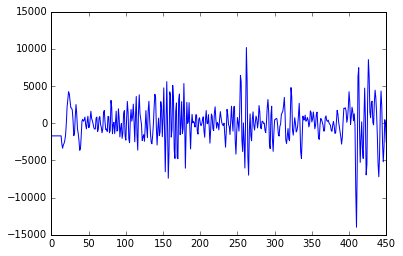

In [94]:
plt.plot(volume[100,100])

In [98]:
ma, mi = np.amax(volume), np.amin(volume)
ma, mi

(30439, -29579)

Often we use the 99th percentile, e.g. for scaling displays.

In [99]:
ma = np.percentile(volume, 99)
mi = -ma
mi, ma

(-6067.0, 6067.0)

The mean of the data should be close to 0.

In [102]:
np.mean(volume)

-11.626421893965706

1 loop, best of 3: 548 ms per loop


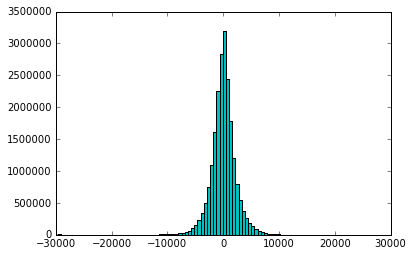

In [111]:
%timeit plt.hist(volume[5:255,5:255].flatten(), bins=100)
plt.show()

## Plotting

Let's start with a single trace. 

First we'll make a time basis.

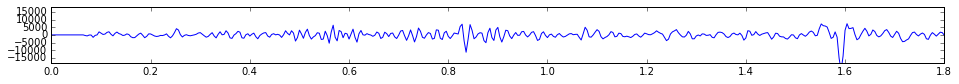

In [125]:
dt = 0.004
maxt = volume.shape[-1] * dt

t = np.arange(0, maxt, dt)

fig = plt.figure(figsize=(16,1))
ax = fig.add_subplot(111)
ax.plot(t, volume[0,0])
ax.set_ylim(3*mi, 3*ma)
#ax.invert_yaxis()
plt.show()

This looks rather elaborate, it's just to illustrate what's really required to make a nice display: supersampling in time via cubic interpolation for a smoother curve. We also often fill in the peaks in what's called a 'wiggle plot'. 

In [126]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


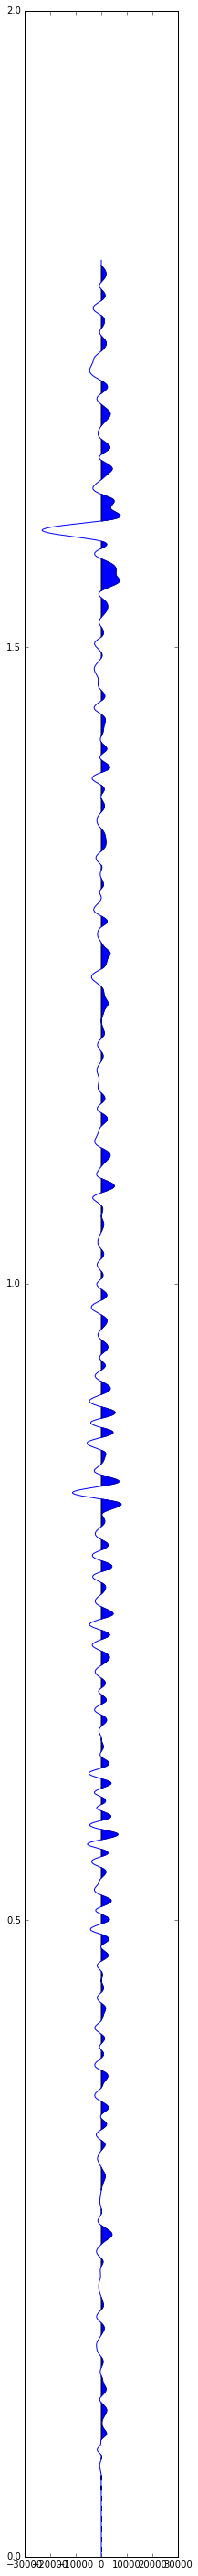

In [139]:
from scipy.interpolate import interp1d

f = interp1d(t, volume[0,0], kind='cubic', bounds_error=False)

t_ = np.arange(0, maxt, 0.0001)
amp = f(t_)
amp[np.isnan(amp)] = 0

plt.figure(figsize=(3,50))
plt.plot(amp, t_)
plt.fill_betweenx(t_, amp, 0, where=amp>0)
plt.xlim(-30000, 30000)

plt.show()

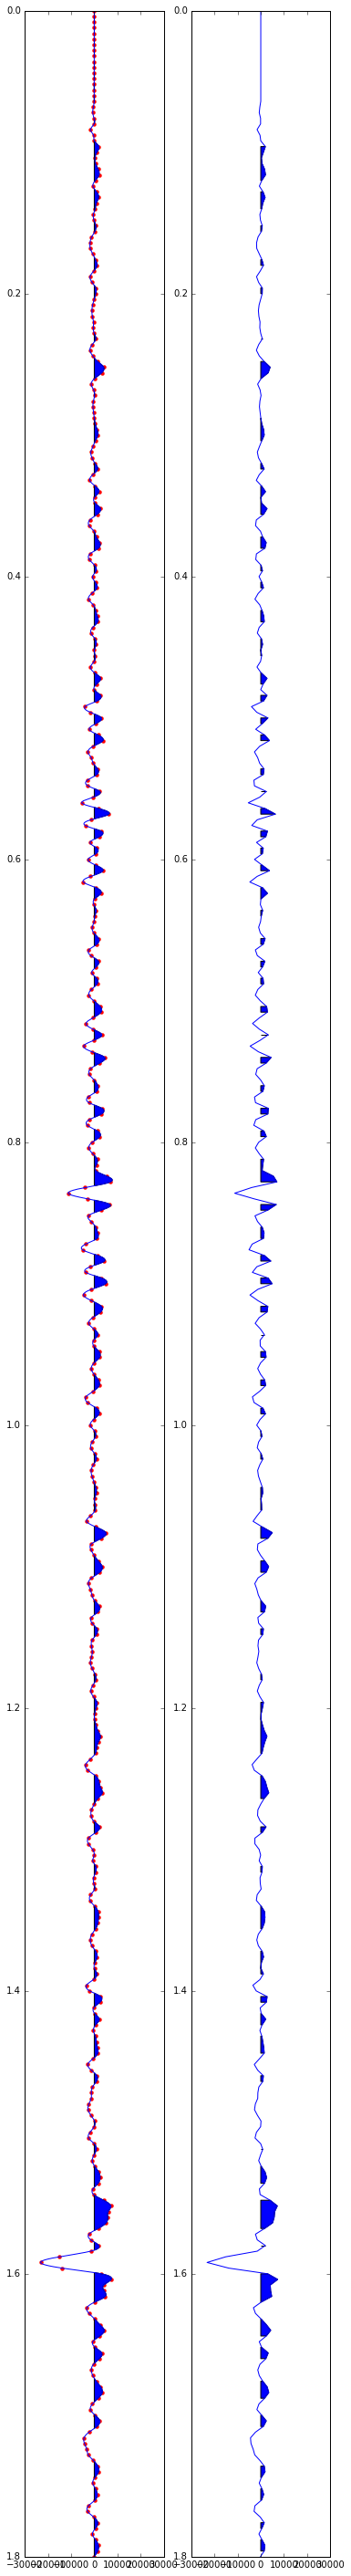

In [140]:
fig = plt.figure(figsize=(6,50))

#                 row col plot
ax = fig.add_subplot(1, 2, 1)
ax.plot(amp, t_)
ax.scatter(volume[0,0], t, lw=0, c='r')
ax.fill_betweenx(t_, amp, 0, where=amp>0)
ax.set_xlim(-30000, 30000)
ax.set_ylim(1.8, 0)

ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(volume[0,0], t)
ax1.fill_betweenx(t, volume[0,0], 0, where=volume[0,0]>0)
ax1.set_xlim(-30000, 30000)
ax1.set_ylim(1.8, 0)

plt.show()

In [141]:
np.isnan(volume)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, 

Plotting multiple traces is easier.

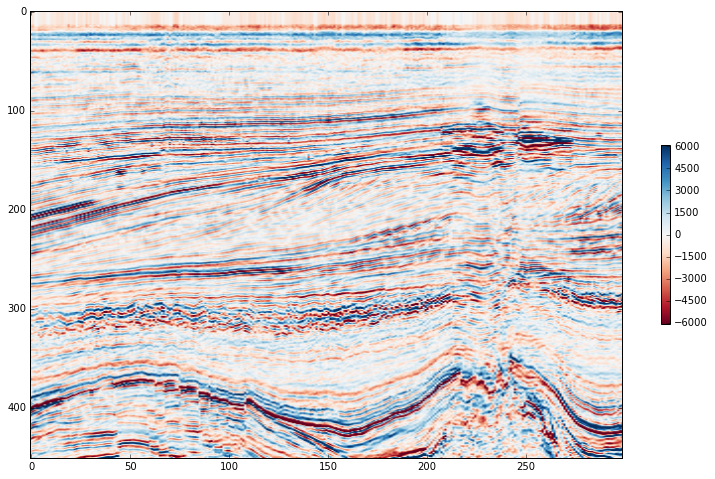

In [148]:
plt.figure(figsize=(14,8))
plt.imshow(volume[5,...].T, aspect=0.5, cmap="RdBu", vmin=mi, vmax=ma)
plt.colorbar(shrink=0.4)
plt.show()

### Q. Can you display a timeslice through the volume?

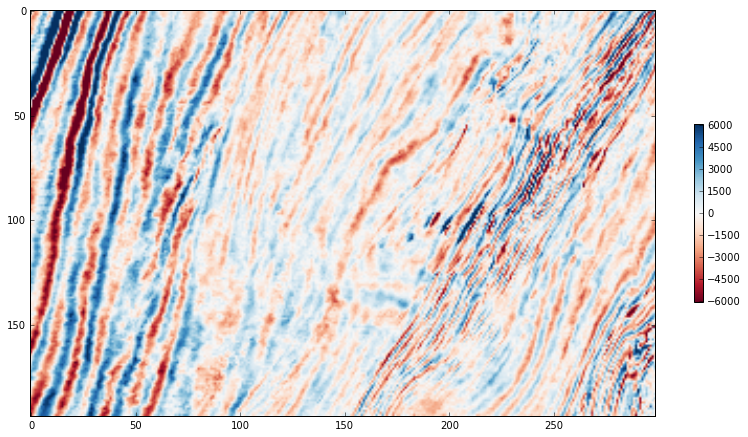

In [150]:
timeslice = volume[:, :, 200]

plt.figure(figsize=(14,8))
plt.imshow(timeslice, cmap="RdBu", vmin=mi, vmax=ma)
plt.colorbar(shrink=0.4)
plt.show()

### Q. Can you display an arbitrary line through the volume??

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>